In [1]:
import os

import itertools
import collections

import pandas as pd
import matplotlib.pyplot as plt

import community
import networkx as nx

In [2]:
df_allegations = pd.read_csv(os.getcwd() + os.sep + 'data' + os.sep + 'results_victimrace_officer_allegations.csv')

In [3]:
df_allegations.head()

,allegation_id,officer_id,final_outcome,allegation,victim_race
0,27716,22414,No Action Taken,Illegal Arrest / False Arrest,Not found
1,27716,22414,No Action Taken,Illegal Arrest / False Arrest,Not found
2,27716,9389,No Action Taken,Illegal Arrest / False Arrest,Not found
3,27716,9389,No Action Taken,Illegal Arrest / False Arrest,Not found
4,27716,7423,No Action Taken,Illegal Arrest / False Arrest,Not found


In [4]:
df_allegations = df_allegations[df_allegations['victim_race'] == 'White']

In [5]:
df_allegations.head()

,allegation_id,officer_id,final_outcome,allegation,victim_race
56,27724,28481,No Action Taken,Illegal Arrest / False Arrest,White
57,27724,28481,No Action Taken,Illegal Arrest / False Arrest,White
58,27724,3097,No Action Taken,Illegal Arrest / False Arrest,White
59,27724,3097,No Action Taken,Illegal Arrest / False Arrest,White
60,27724,8287,No Action Taken,Illegal Arrest / False Arrest,White


In [6]:
len(df_allegations)

12638

In [7]:
df_officer_allegations = df_allegations[['officer_id', 'allegation']]

In [8]:
df_officer_allegations = df_officer_allegations.groupby('officer_id')['allegation'].apply(list)

In [9]:
def generate_edges(list_of_alleg):
    return [(list_of_alleg[i], list_of_alleg[i+1])for i in range(0,len(list_of_alleg)-1)]

In [10]:
edges = []

for row in df_officer_allegations:
    count = len(row)
    if count > 1:
        edges.extend(generate_edges(row))

In [11]:
edges

[('Unnecessary Display Of Weapon / On Duty',
  'Unnecessary Display Of Weapon / On Duty'),
 ('Unnecessary Display Of Weapon / On Duty',
  'Unnecessary Display Of Weapon / On Duty'),
 ('Unnecessary Display Of Weapon / On Duty',
  'Unnecessary Display Of Weapon / On Duty'),
 ('Unnecessary Display Of Weapon / On Duty',
  'Unnecessary Display Of Weapon / On Duty'),
 ('Unnecessary Display Of Weapon / On Duty',
  'Unnecessary Display Of Weapon / On Duty'),
 ('Unnecessary Display Of Weapon / On Duty',
  'Domestic Altercation - Physical Abuse'),
 ('Domestic Altercation - Physical Abuse',
  'Domestic Altercation - Physical Abuse'),
 ('Domestic Incident - Not Physical', 'Domestic Incident - Not Physical'),
 ('Inadequate / Failure To Provide Service',
  'Inadequate / Failure To Provide Service'),
 ('Use Of Profanity', 'Neglect Of Duty'),
 ('Neglect Of Duty', 'Neglect Of Duty'),
 ('Unnecessary Display Of Weapon / Off Duty',
  'Unnecessary Display Of Weapon / Off Duty'),
 ('Unnecessary Display Of W

In [12]:
len(edges), len(set(edges))

(7892, 947)

In [13]:
edge_counts = collections.Counter(edges)

In [14]:
len(edge_counts)

947

In [15]:
df_edges = pd.DataFrame.from_dict(edge_counts, columns=['Edge Frequency'], orient='index')

In [16]:
df_edges.head()

,Edge Frequency
"(Unnecessary Display Of Weapon / On Duty, Unnecessary Display Of Weapon / On Duty)",70
"(Unnecessary Display Of Weapon / On Duty, Domestic Altercation - Physical Abuse)",1
"(Domestic Altercation - Physical Abuse, Domestic Altercation - Physical Abuse)",350
"(Domestic Incident - Not Physical, Domestic Incident - Not Physical)",255
"(Inadequate / Failure To Provide Service, Inadequate / Failure To Provide Service)",524


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109019e50>]],
      dtype=object)

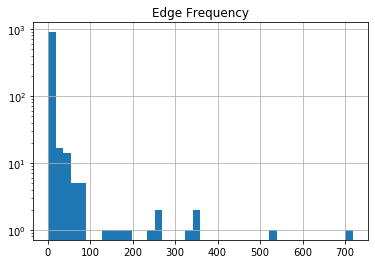

In [17]:
df_edges.hist(bins=40, log=True)

In [18]:
G = nx.Graph()

In [19]:
nodes = dict()

for row in set(edges):
    if row[0] not in nodes:
        nodes[row[0]] = len(nodes)
        G.add_node(nodes[row[0]], name=row[0])
    if row[1] not in nodes:
        nodes[row[1]] = len(nodes)
        G.add_node(nodes[row[1]], name=row[1])
    G.add_edge(nodes[row[0]], nodes[row[1]], weight=float(edge_counts[row]))

In [20]:
len(nodes)

101

In [21]:
len(G.edges)

725

In [22]:
partition = community.best_partition(G, weight='weight')

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


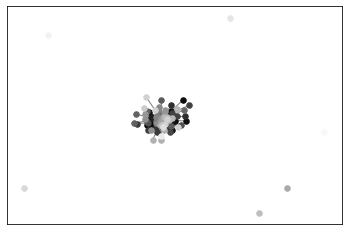

In [23]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 30,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [24]:
community.modularity(partition, G)

0.7355151317582532

In [25]:
len(partition.values())

101

In [26]:
communities = { i : [] for i in range(0,40) }

[communities[community].append(G.node[node]['name']) for node, community in enumerate(partition.values())]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [27]:
communities

{0: ['Slow / No Response',
  'Inadequate / Failure To Provide Service',
  'Fail To Enforce Traffic Regulations',
  'Absent Without Permission',
  'Leaving Assignment (District, Beat, Sector, Court)'],
 1: ['Miscellaneous',
  'Arrest, Improper Procedures',
  'Excessive Force - Use Of Firearm / Off Duty - Injury',
  'Properly Direct Subordinate',
  'U Converted To C.R. (Records Keeping Only, Initial)',
  'Intoxicated On Duty'],
 2: ['Neglect Of Duty',
  'Violation (Other Than D.U.I.) - On Duty',
  'Other Felony',
  'Criminal Sexual Assault',
  'Failure To Ensure - Civil Rights'],
 3: ['Unnecessary Physical Contact / Off Duty - No Injury'],
 4: ['Unnecessary Display Of Weapon / On Duty', 'Intoxicated Off Duty'],
 5: ['Misuse Of Department Equipment / Supplies',
  'Proper Care - Injury / Death'],
 6: ['Improper Search Of Vehicle', 'Threats', 'Seat Belts'],
 7: ['Illegal Arrest / False Arrest',
  'Gang Affiliation',
  'Use / Abuse Drugs / Controlled Substance - Off Duty',
  'Take Down (Thro